In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [4]:
data = pd.read_csv("/kaggle/input/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
#гипотеза 1: из общего кол-ва пассажиров женщин выживало больше, чем мужчин
survival_by_gender=data.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()
print(survival_by_gender)

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


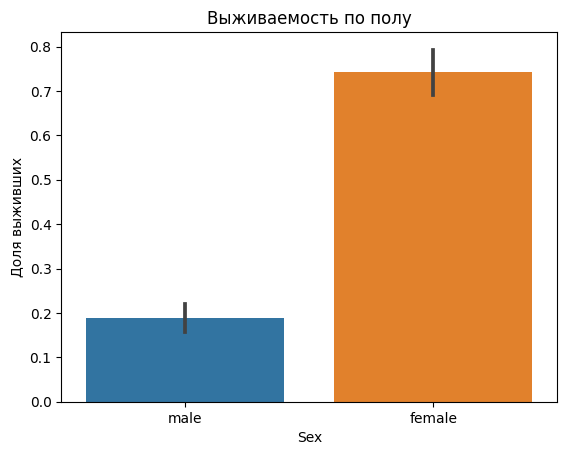

In [7]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Выживаемость по полу')
plt.ylabel('Доля выживших')
plt.show()

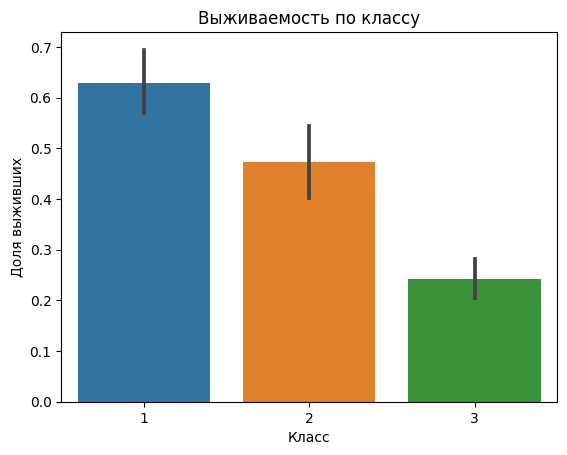

In [8]:
#гипотеза 2: пассажиров из первого класса выжило больше, чем пассажиров из второго и третьего классов
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Выживаемость по классу')
plt.ylabel('Доля выживших')
plt.xlabel('Класс')
plt.show()


In [9]:
#гипотеза 3: пассажиры с родственниками на борту имели больше шансов выжить
data['Relatives']=data['SibSp']+data['Parch'] #создание нового столбца с общим кол-вом родственников
data['Has_Relatives']=data['Relatives'].apply(lambda x:1 if x>0 else 0) #преобразовали кол-во родственников в бин.признак (-1-у кого были родственники на борту, 0 - у кого не было)
survival_by_relatives=data.groupby('Has_Relatives')['Survived'].value_counts(normalize=True).unstack() #подсчёт доли выживших кто был с родственниками на борту и без
print(survival_by_relatives)

Survived              0         1
Has_Relatives                    
0              0.696462  0.303538
1              0.494350  0.505650


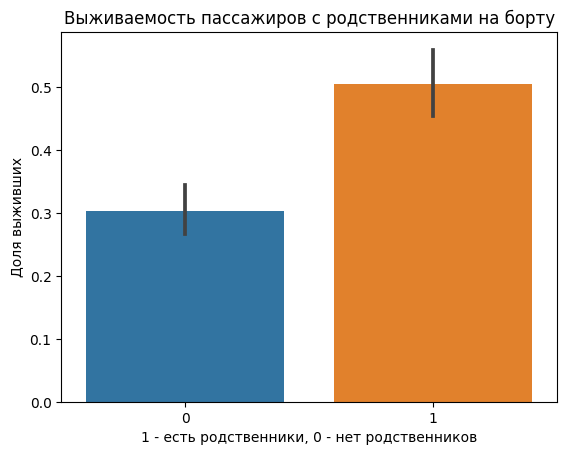

In [10]:
#график, подтверждающий гипотезу 3
sns.barplot(x='Has_Relatives', y='Survived', data=data)
plt.title('Выживаемость пассажиров с родственниками на борту')
plt.ylabel('Доля выживших')
plt.xlabel('1 - есть родственники, 0 - нет родственников')
plt.show()

In [21]:
#гипотеза 4: дети имели больше шансов выжить
data['Child']=data['Age'].apply(lambda x:1 if x<16 else 0) #добавим новый столбец,где пассажиры,младше 16 лет - 1, а кто старше этого возраста - 0 (деление на ребёнок/не ребёнок)
survival_by_age=data.groupby('Child')['Survived'].value_counts(normalize=True).unstack() #группировка по новому признаку и подсчёт долю выживших среди детей и взрослых
print(survival_by_age)

Survived         0         1
Child                       
0         0.637376  0.362624
1         0.409639  0.590361


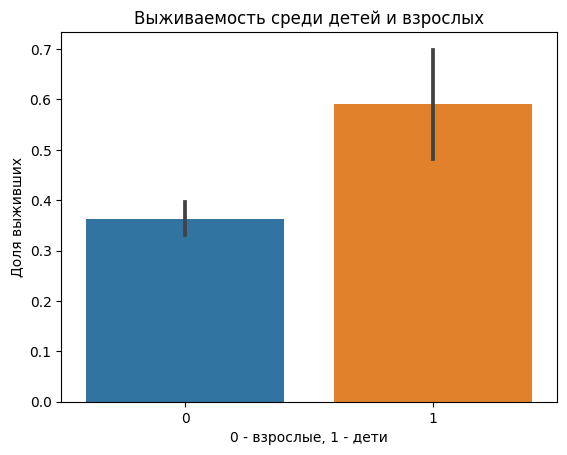

In [22]:
#график, подтверждающий гипотезу 4
sns.barplot(x='Child', y='Survived', data=data)
plt.title('Выживаемость среди детей и взрослых')
plt.ylabel('Доля выживших')
plt.xlabel('0 - взрослые, 1 - дети')
plt.show()

In [23]:
#гипотеза 5: пассажиры, севшие на борт в разных портах, имели разные шансы на выживание
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
survival_by_embarked=data.groupby('Embarked')['Survived'].value_counts(normalize=True).unstack() #группировка по новому признаку и подсчёт доли выживших с разных портов
print(survival_by_embarked)

Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.660991  0.339009


/tmp/ipykernel_30/2337164117.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


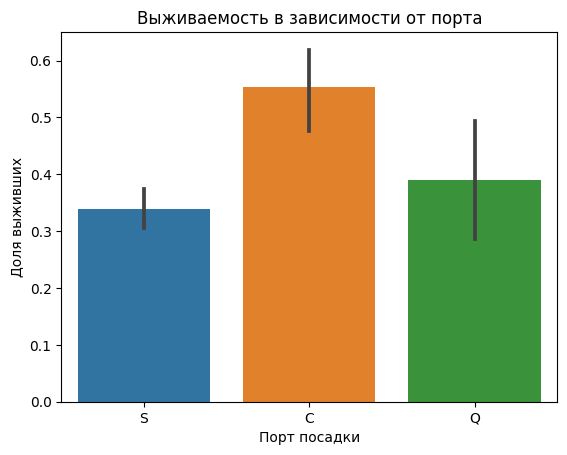

In [24]:
#график, подтверждающий гипотезу 5
sns.barplot(x='Embarked', y='Survived', data=data)
plt.title('Выживаемость в зависимости от порта')
plt.ylabel('Доля выживших')
plt.xlabel('Порт посадки')
plt.show()

In [25]:
#гипотеза 6: пассажиры с высокими тарифами имели больше шансов на выживание
data['Fare'].fillna(data['Fare'].median(), inplace=True) #проверка наличия пропущенных значений в Fare
data['Fare_Category']=pd.qcut(data['Fare'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High']) #разделение билетов на категории от наивысшего к меньшему
survival_by_fare=data.groupby('Fare_Category')['Survived'].value_counts(normalize=True).unstack() #группировка данным по категориям, подсчёт доли выживших
print(survival_by_fare)

Survived              0         1
Fare_Category                    
Low            0.802691  0.197309
Mid-Low        0.696429  0.303571
Mid-High       0.545045  0.454955
High           0.418919  0.581081


/tmp/ipykernel_30/2345758009.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Fare'].fillna(data['Fare'].median(), inplace=True) #проверка наличия пропущенных значений в Fare
/tmp/ipykernel_30/2345758009.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare=data.groupby('Fare_Category')['Survived'].value_counts(nor

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


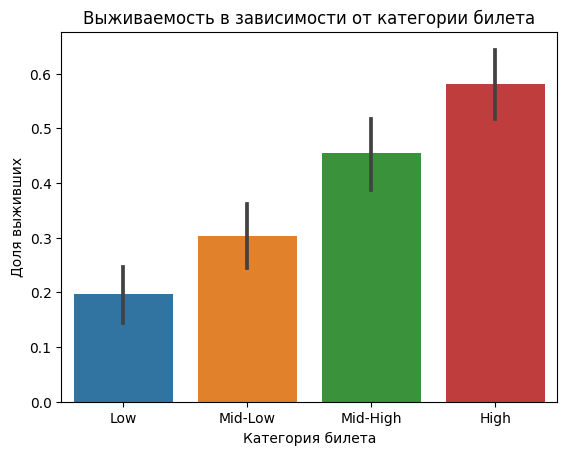

In [26]:
#график, подтверждающий гипотезу 6
sns.barplot(x='Fare_Category', y='Survived', data=data)
plt.title('Выживаемость в зависимости от категории билета')
plt.ylabel('Доля выживших')
plt.xlabel('Категория билета')
plt.show()

In [16]:
#Выводы
#Гипотеза 1: из общего кол-ва пассажиров женщин выживало больше, чем мужчин
#пояснение: пассажиры следовали правилу, который гласит, что женщин и детей нужно спасать в первую очередь
#Гипотеза 2: пассажиров из первого класса выжило больше, чем пассажиров из второго и третьего классов
#пояснение: пассажиры первого класса были ближе всего к выходу, нежели пассажиры из второго и третьего классов
#Гипотеза 3: пассажиры с родственниками на борту имели больше шансов выжить
#пояснение: пассажиры с родственниками на борту получали помощь от членов семьи
#Гипотеза 4: дети имели больше шансов выжить
#пояснение: пассажиры следовали правилу, который гласит, что женщин и детей нужно спасать в первую очередь, дети получали приоритет при спасении
#Гипотеза 5: пассажиры, севшие на борт в разных портах, имели разные шансы на выживание
#пояснение: пассажиры имели различие в социальном статусе, которое позволило повлиять на их возможность спасения
#Гипотеза 6: пассажиры с высокими тарифами имели больше шансов на выживание
#пояснение: стоимость билета может коррелировать на соц.статус человека, а также в расположении кают ближе к спасательным выходам(шлюпкам)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Name           891 non-null    object  
 4   Sex            891 non-null    object  
 5   Age            714 non-null    float64 
 6   SibSp          891 non-null    int64   
 7   Parch          891 non-null    int64   
 8   Ticket         891 non-null    object  
 9   Fare           891 non-null    float64 
 10  Cabin          204 non-null    object  
 11  Embarked       891 non-null    object  
 12  Relatives      891 non-null    int64   
 13  Has_Relatives  891 non-null    int64   
 14  Child          891 non-null    int64   
 15  Fare_Category  891 non-null    category
dtypes: category(1), float64(2), int64(8), object(5)
memory usage: 105.6+ KB


In [33]:
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

In [34]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [39]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [41]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [43]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [46]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [47]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Has_Relatives,Child,Fare_Category
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2,1,1,0,Low
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,1,1,0,High
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2,0,0,0,Mid-Low
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,1,1,0,High
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2,0,0,0,Mid-Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2,0,0,0,Mid-Low
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2,0,0,0,Mid-High
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2,3,1,0,Mid-High
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0,0,0,0,Mid-High


In [49]:
x = data.drop(columns=['Survived'])
y = data['Survived']

In [51]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Has_Relatives,Child,Fare_Category
0,1,3,108,1,22.0,1,0,523,7.2500,147,2,1,1,0,Low
1,2,1,190,0,38.0,1,0,596,71.2833,81,0,1,1,0,High
2,3,3,353,0,26.0,0,0,669,7.9250,147,2,0,0,0,Mid-Low
3,4,1,272,0,35.0,1,0,49,53.1000,55,2,1,1,0,High
4,5,3,15,1,35.0,0,0,472,8.0500,147,2,0,0,0,Mid-Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.0,0,0,101,13.0000,147,2,0,0,0,Mid-Low
887,888,1,303,0,19.0,0,0,14,30.0000,30,2,0,0,0,Mid-High
888,889,3,413,0,NaN,1,2,675,23.4500,147,2,3,1,0,Mid-High
889,890,1,81,1,26.0,0,0,8,30.0000,60,0,0,0,0,Mid-High


In [53]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [55]:
d = {'Low':0, 'Mid-Low' :1, 'Mid':2, 'Mid-High':3, 'High':4} # создаем словарь

In [56]:
data['Fare_Category'] = data['Fare_Category'].apply(lambda x:d[x])

In [57]:
# Заменили колонку 'Age_Category' на численные значения. 
passs = {'Взрослые':0, 'Молодые' :1, 'Пожилые': 2 }  # создаем словарь

In [60]:
# Заменяем male и female на 0 и 1 с помощью словаря 
d = {'male':0, 'female' :1} # создаем словарь 

In [63]:
data['Sex'].head() #везде 0 и 1 в колонке 'Sex'.

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [65]:
# Заполняем пустые ячейки медианным значением по возрасту.
data['Age'] = data['Age'].fillna(x['Age'].median)

In [66]:
data['Age'].isnull().sum()
# Все ячейки в колонке возраст заполнены 

0

In [67]:
# Проваеряем есть ли пустые ячейки в колонке 'Sex'.
data['Sex'].isnull().sum()

0

In [68]:
# Проваеряем есть ли пустые ячейки в колонке 'Pclass'.
data['Pclass'].isnull().sum()

0

In [69]:
# Проваеряем есть ли пустые ячейки в колонке 'Fare'.
data['Fare'].isnull().sum()

0

In [70]:
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

In [73]:
data.shape

(891, 16)

In [74]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Relatives        0
Has_Relatives    0
Child            0
Fare_Category    0
dtype: int64

In [75]:
columns_target = ['Survived'] # наша целевая колонка
columns_train = ['Pclass', 'Sex', 'Age', 'Fare']

In [82]:
X = data[columns_train] 
y = data[columns_target] 

In [84]:
# Импортируем необходимые библиотеки
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.regularizers import l2

# Генерация искусственного набора данных для примера
# Здесь X и y создаются для классификации, замените на ваши данные
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создаем модель нейронной сети
model = Sequential()

# Добавляем первый слой с активацией Leaky ReLU
model.add(Dense(units=128, input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU активация
model.add(Dropout(0.3))

# Добавляем второй слой с активацией Leaky ReLU
model.add(Dense(units=64, kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU активация
model.add(Dropout(0.3))

# Добавляем третий слой с активацией Leaky ReLU
model.add(Dense(units=32, kernel_regularizer=l2(0.05)))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU активация
model.add(Dropout(0.3))

# Добавляем выходной слой
model.add(Dense(units=1, activation='sigmoid'))

# Компилируем модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучаем модель
history = model.fit(X_train, y_train, epochs=30, batch_size=20, validation_split=0.2)

# Оцениваем модель на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5625 - loss: 3.5729 - val_accuracy: 0.8250 - val_loss: 2.8231
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7645 - loss: 2.6687 - val_accuracy: 0.8438 - val_loss: 2.1539
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8487 - loss: 2.0564 - val_accuracy: 0.8562 - val_loss: 1.6380
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8405 - loss: 1.5763 - val_accuracy: 0.8500 - val_loss: 1.2724
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8591 - loss: 1.2616 - val_accuracy: 0.8750 - val_loss: 1.0147
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8618 - loss: 1.0078 - val_accuracy: 0.8750 - val_loss: 0.8304
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8757 - loss: 0.8721 - val_accuracy: 0.8687 - val_loss: 0.6981
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8920 - loss: 0.7020 - val_accuracy: 0.8687 - val_loss:

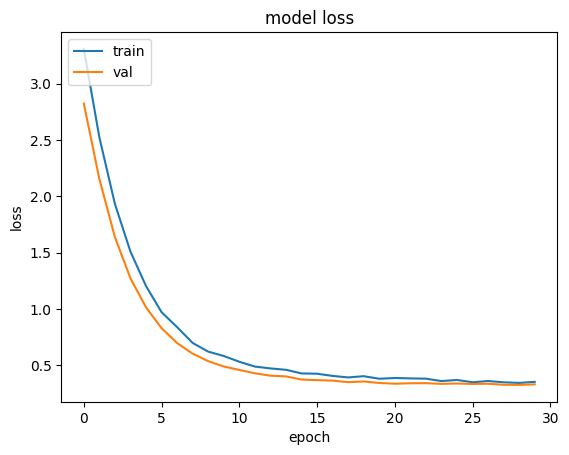

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
 # Строим график снижения loss по эпохам
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

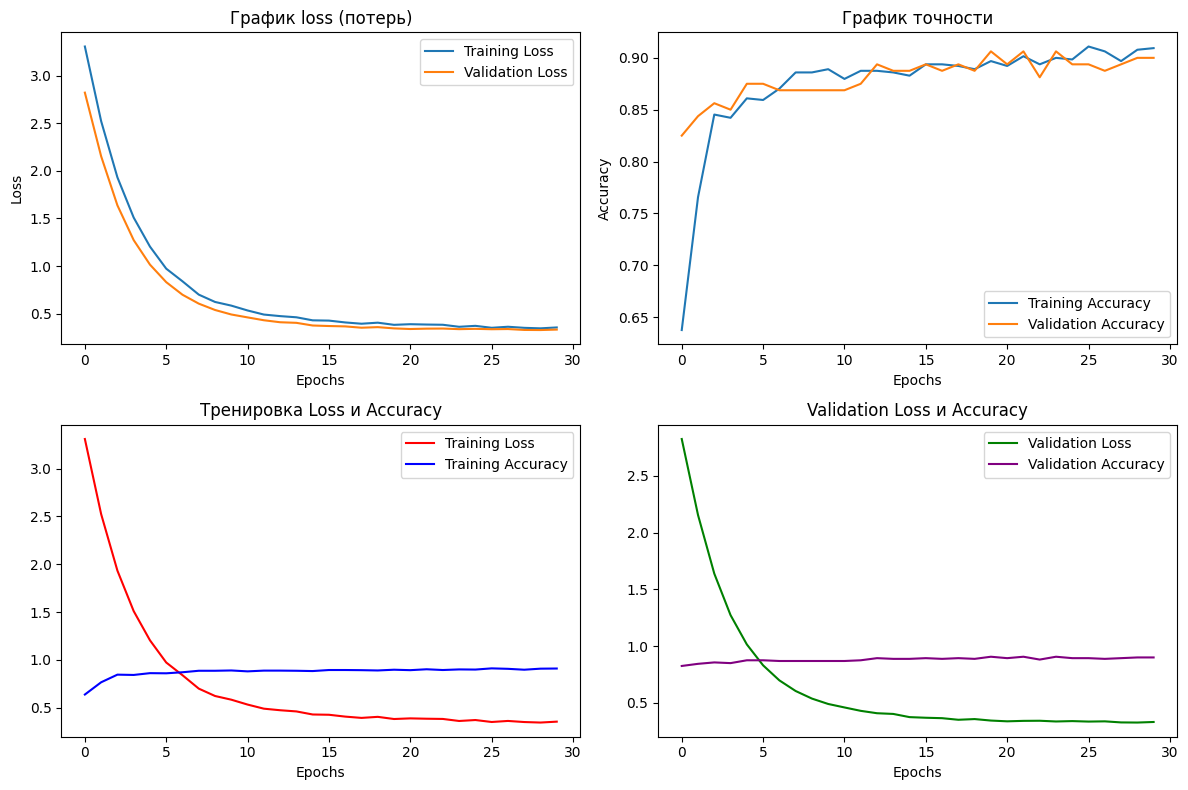

In [86]:
class HistoryDummy:
    def __init__(self):
        self.history = {
            'loss': history.history['loss'],
            'val_loss': history.history['val_loss'],
            'accuracy': history.history['accuracy'],
            'val_accuracy': history.history['val_accuracy']
        }

history = HistoryDummy()

# График 1: Потери при обучении в сравнении с потерями при проверке
plt.figure(figsize=(12, 8))

# График loss (потерь)
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('График loss (потерь)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# График точности
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('График точности')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Комбинированные потери и точность на одном графике
plt.subplot(2, 2, 3)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.title('Тренировка Loss и Accuracy')
plt.xlabel('Epochs')
plt.legend()

# График val_loss и val_accuracy
plt.subplot(2, 2, 4)
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='purple')
plt.title('Validation Loss и Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.tight_layout()
plt.show()